In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import sys
sys.path.append("../src/utils/")
from lossFunction import LossFunction

In [2]:
input_dir = "."
file = 'color_spectrum.jpg'
file_path = os.path.join(input_dir, file)
image = cv2.imread(file_path)

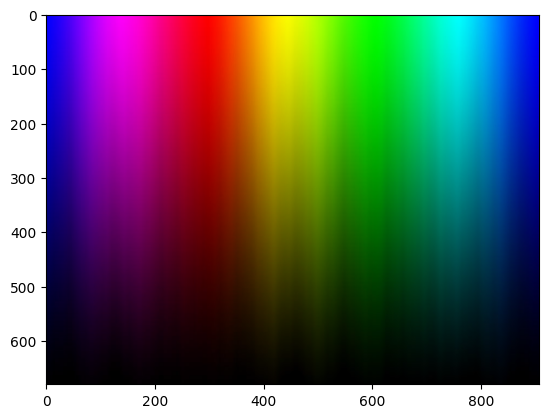

In [3]:
plt.imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

In [4]:
loss = LossFunction()
pixel = (0, 255, 255)
outClass = loss.lab2class(pixel)
print(outClass)
a, b = loss.class2ab(outClass)
print(a, b)

255
248 248


In [5]:
imageAsOutput = image.copy()
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        a, b = loss.class2ab(loss.lab2class(image[x, y]))
        l = image[x,y][0]
        imageAsOutput[x,y] = [l,a,b]

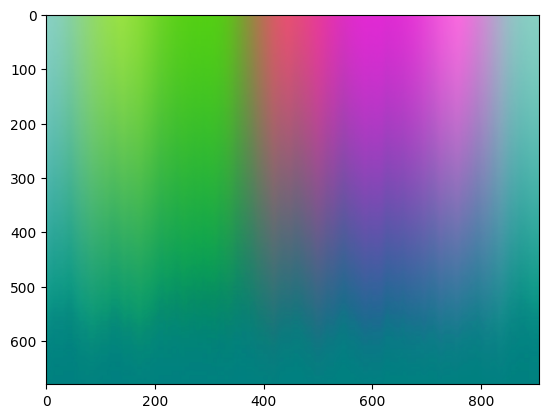

In [6]:
plt.imshow(image)

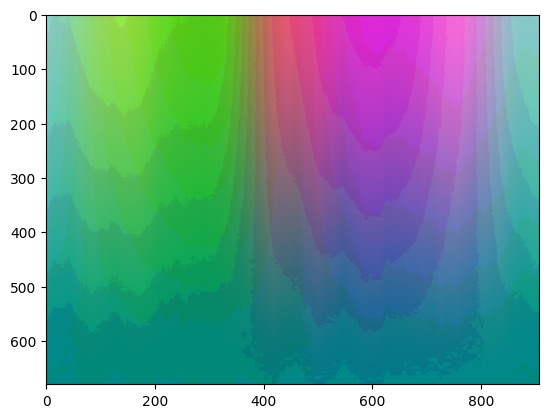

In [7]:
plt.imshow(imageAsOutput)

In [8]:
output = [[0.5 for _ in range(256)] for _ in range(image.shape[0] * image.shape[1])] #typical output from nn, pixels x classes

In [9]:
loss = LossFunction()
loss.imageEntrophyLoss(output, image)

427505.45508045884